In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

In [2]:
# This notebook creates node-to-node strong scaling plots for OpenSn.

# The systems data structure contains experimental timings and other basic system information.
# For each system, the following fields are required:
#
# label:                Name and short description of the system. Used in the plot legend.
# serial_time:          Serial grind time used to compute ideal scaling. Only one ideal
#                       scaling plot will be generated for each system. For multiple
#                       experimental runs, serial_time should probably be computed as the
#                       average of the serial times from all experimental runs. In the case
#                       that code improvements result in significant changes in serial
#                       grind time, it's probably best to add a new system definition.
# nodes:                List of nodes that correspond to experimental timing results.
# experimental_timings: Grind time values produced by OpenSn for the strong scaing input
#                       run on the specified number of nodes.
systems = {
    "dane": {
        # LLNL Dane - 112 Intel Sapphire Rapids cores/node, 105MB cache/CPU, 2.28GB DDR5 per core
        "label": "LLNL Dane (64 rpn)",
        "serial_time": 21.53,
        "nodes": [1, 2, 4, 8, 16, 32, 64, 128, 256, 512],
        "experimental_timings": {
            "2024-10-29": [21.53, 9.92, 4.76, 2.18, 0.99, 0.51, 0.26, 0.14, 0.09, 0.07],
            # Add additional experimental data here
        }
    },
    # Add additional systems here
}

# Select system to plot. Leave empty to plot all systems.
system_to_plot = ""

# Plot subtitle
subtitle = "~256 cells/rank, 448 angles, 64 groups, single-groupset, single-angle aggregation"

# Save plot? 
save_plot = False
save_filename = "opensn-strong-scaling.png"

# DO NOT EDIT ANYTHING BELOW THIS CELL

In [3]:
# Compute ideal grind times
for system_name, system_data in systems.items():
    serial_time = system_data["serial_time"]
    nodes = system_data["nodes"]
    ideal_times = [serial_time / n for n in nodes]
    system_data["ideal_times"] = ideal_times
    
# Colors and markers
colors = plt.cm.tab20.colors
markers = ['o', 's', 'd', '^', 'v', 'P', '*', 'X', 'D', 'h']
color_cycle = itertools.cycle(colors)
marker_cycle = itertools.cycle(markers)

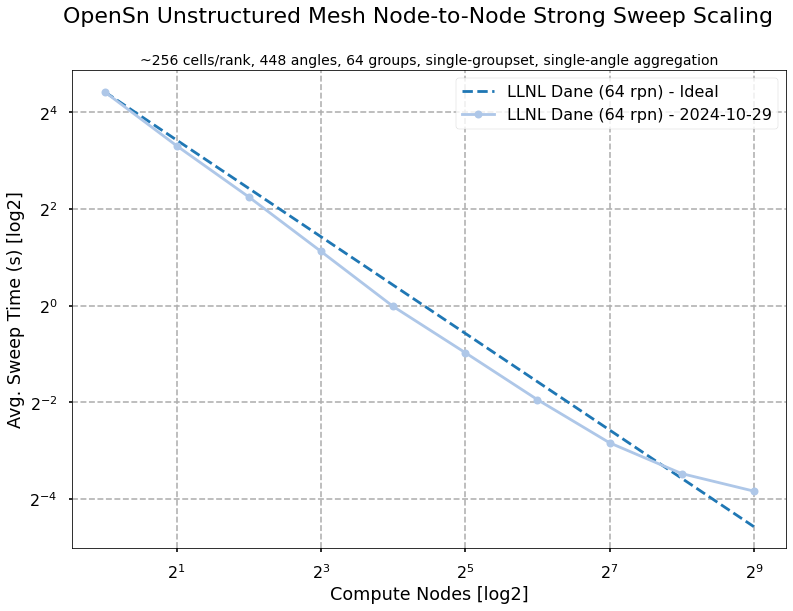

In [4]:
# Format plot
plt.style.use('seaborn-poster')
plt.suptitle("OpenSn Unstructured Mesh Node-to-Node Strong Sweep Scaling", fontsize=22)
plt.title(subtitle, fontsize=14)
plt.grid(linestyle='--')
plt.xlabel('Compute Nodes [log2]');
plt.xscale('log', base=2)
plt.ylabel('Avg. Sweep Time (s) [log2]');
plt.yscale('log', base=2)

if system_to_plot in systems:
    systems_to_plot = {system_to_plot: systems[system_to_plot]}
else:
    systems_to_plot = systems

# Plot ideal and experimental grind times for selected systems
for system_name, system_data in systems_to_plot.items():
    label = system_data["label"]
    nodes = system_data["nodes"]
    
    # Ideal
    color = next(color_cycle)
    plt.plot(
        nodes,
        system_data["ideal_times"],
        linestyle='--',
        color=color,
        label=f'{label} - Ideal'
    )

    # Experimental
    for date, values in system_data["experimental_timings"].items():
        color = next(color_cycle)
        marker = next(marker_cycle)
        
        plt.plot(
            nodes,
            values,
            marker=marker,
            markersize=8,
            markerfacecolor=color,
            color=color,
            label=f'{label} - {date}'
        )

plt.legend()

if save_plot:
    plt.savefig(save_filename)